# Method Assignment 3
    Decision trees
    Thi, Le Thanh
    1504521
    Metropolia UAS

# Tasks
Learn to build adecision tree classifiier. <br>
Improve data manipulation skills in Python <br>

In [61]:
# Import requires libraries
import pandas as pd
import numpy as np

import sklearn
from sklearn import tree

import IPython
from IPython.display import Image

In [62]:
# Read the data
df = pd.read_csv('phishing.csv', sep = ';')

# Drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)
df.head(10)                

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [63]:
# Make an input dataset
df_in = df.loc[:, "having_IP_Address":"Statistical_report"]
df_in.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,1,0,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,0,1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,1,1,0,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1


In [64]:
# Output dataset
df_out = df.loc[:,"Result"]
df_out.head(10)

0   -1
1   -1
2   -1
3   -1
4    1
5    1
6   -1
7   -1
8    1
9   -1
Name: Result, dtype: int64

In [68]:
# Build a model
df_cl = sklearn.tree.DecisionTreeClassifier(max_depth = 4)
df_cl.fit(df_in,df_out)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
# Train it
columns = df.columns.get_values()

with open("decision tree.txt","w") as file:
    file = sklearn.tree.export_graphviz(df_cl, out_file = file, 
                                        feature_names = columns[:30], 
                                        class_names = ["no", "yes"])

In [70]:
# Using the model to make decision and calculate the accuraccy
predict = df_cl.predict(df_in)
df_predict = pd.DataFrame(predict)

matrix = sklearn.metrics.confusion_matrix(df_out, predict)
print("Resulted Confusion Matrix is: ")
print(matrix)

accuracy = (matrix[0][0]+matrix[1][1])/(
    matrix[0][0]+matrix[1][1]+matrix[0][1]+matrix[1][0])
print("Accuracy calculated from the training set:", accuracy)

report = sklearn.metrics.classification_report(df_out, predict, target_names=["no", "yes"])
print("\n")
print(report)

Resulted Confusion Matrix is: 
[[4423  475]
 [ 433 5724]]
Accuracy calculated from the training set: 0.917865219358


             precision    recall  f1-score   support

         no       0.91      0.90      0.91      4898
        yes       0.92      0.93      0.93      6157

avg / total       0.92      0.92      0.92     11055



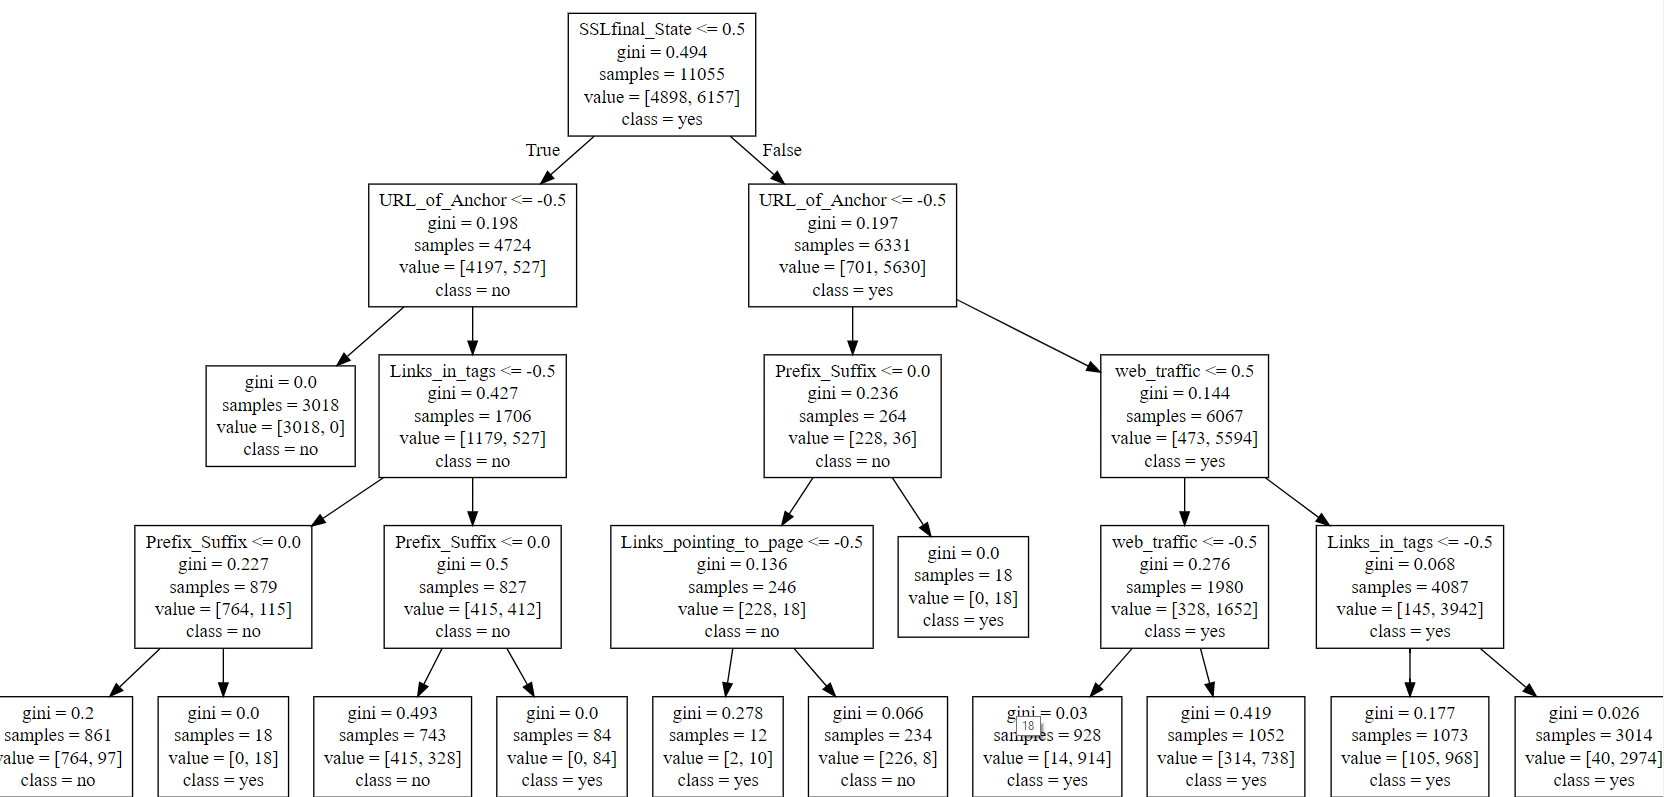

In [73]:
# Show the Decision Tree model
Image(filename="image.png") 